<a href="https://colab.research.google.com/github/TrungDong888/BTVN_AI/blob/main/PhamTrungDong_18146101_NhanDienMonAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [3]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Món ăn/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 564 images belonging to 10 classes.


In [6]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Món ăn/validation',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 99 images belonging to 10 classes.


In [7]:
training_data.class_indices

{'banhchung': 0,
 'banhdacua': 1,
 'banhkhot': 2,
 'banhmi': 3,
 'cachienxu': 4,
 'chaca': 5,
 'goicuon': 6,
 'nemchua': 7,
 'thitkhotau': 8,
 'xoigac': 9}

In [8]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [9]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
history=model.fit(training_data,epochs=30,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])


Epoch 1/30
18/18 [==============================] - 27s 1s/step - loss: 4.2976 - accuracy: 0.1152 - val_loss: 2.3267 - val_accuracy: 0.1010
Epoch 2/30
18/18 [==============================] - 18s 947ms/step - loss: 2.3307 - accuracy: 0.1117 - val_loss: 2.3632 - val_accuracy: 0.1010
Epoch 3/30
18/18 [==============================] - 17s 947ms/step - loss: 2.3002 - accuracy: 0.1188 - val_loss: 2.2953 - val_accuracy: 0.1010
Epoch 4/30
18/18 [==============================] - 17s 936ms/step - loss: 2.2569 - accuracy: 0.1472 - val_loss: 2.3347 - val_accuracy: 0.1515
Epoch 5/30
18/18 [==============================] - 17s 960ms/step - loss: 2.2367 - accuracy: 0.1791 - val_loss: 2.2863 - val_accuracy: 0.1414
Epoch 6/30
18/18 [==============================] - 17s 943ms/step - loss: 2.2640 - accuracy: 0.1596 - val_loss: 2.3024 - val_accuracy: 0.1111
Epoch 7/30
18/18 [==============================] - 17s 973ms/step - loss: 2.3116 - accuracy: 0.0904 - val_loss: 2.3044 - val_accuracy: 0.1010
Ep

<function matplotlib.pyplot.show>

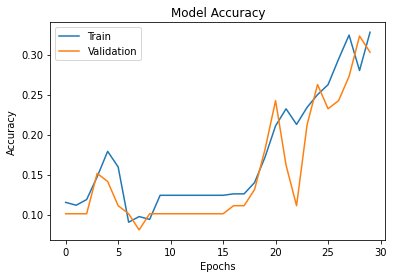

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
model.save("Nhan_dien_thuc_an.h5")

In [13]:

model_nhandien=load_model('Nhan_dien_thuc_an.h5')

banhmi


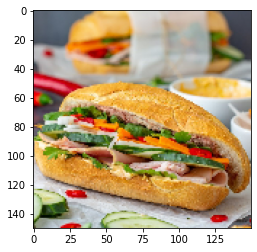

In [37]:
img=load_img("/content/drive/MyDrive/Món ăn/test/banhmi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result = model_nhandien.predict(img)
if round(result[0][0])==1:
  predict = 'banhchung'
if round(result[0][1])==1:
  predict = 'banhdacua'
if round(result[0][2])==1:
  predict = 'banhkhot'
if round(result[0][3])==1:
  predict = 'banhmi'
if round(result[0][4])==1:
  predict = 'cachienxu'
if round(result[0][5])==1:
  predict = 'chaca'
if round(result[0][6])==1:
  predict = 'goicuon'
if round(result[0][7])==1:
  predict = 'nemchua'
if round(result[0][8])==1:
  predict = 'thitkhotau'
if round(result[0][9])==1:
  predict = 'xoigac'
print(predict)

goicuon


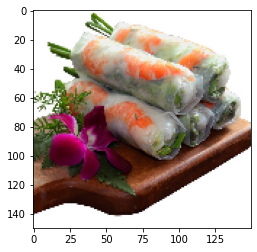

In [40]:
img=load_img("/content/drive/MyDrive/Món ăn/test/goicuon.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

thitkhotau


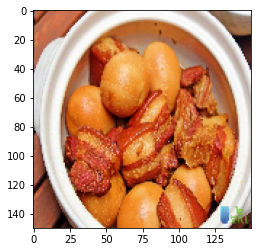

In [44]:
img=load_img("/content/drive/MyDrive/Món ăn/test/thitkhotau.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

nemchua


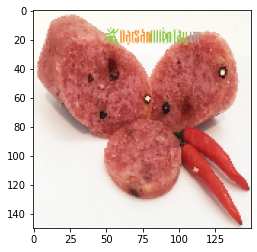

In [55]:
img=load_img("/content/drive/MyDrive/Món ăn/test/nemchua.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0]):
  prediction='banhchung'
if round(result[0][1]):
  prediction='banhdacua'
if round(result[0][2]):
  prediction='banhkhot'
if round(result[0][3]):
  prediction='banhmi'
if round(result[0][4]):
  prediction='cachienxu'
if round(result[0][5]):
  prediction='chaca'
if round(result[0][6]):
  prediction='goicuon'
if round(result[0][7]):
  prediction='nemchua'
if round(result[0][8]):
  prediction='thitkhotau'
if round(result[0][9]):
  prediction='xoigac'
print(prediction)

xoigac


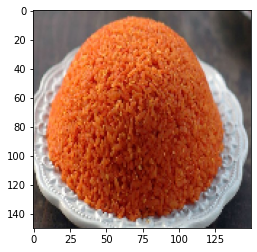

In [50]:
img=load_img("/content/drive/MyDrive/Món ăn/test/xoigac.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0]):
  prediction='banhchung'
if round(result[0][1]):
  prediction='banhdacua'
if round(result[0][2]):
  prediction='banhkhot'
if round(result[0][3]):
  prediction='banhmi'
if round(result[0][4]):
  prediction='cachienxu'
if round(result[0][5]):
  prediction='chaca'
if round(result[0][6]):
  prediction='goicuon'
if round(result[0][7]):
  prediction='nemchua'
if round(result[0][8]):
  prediction='thitkhotau'
if round(result[0][9]):
  prediction='xoigac'
print(prediction)